# Random ForestTree implemenntation:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.model_selection import GridSearchCV


from sklearn.impute import SimpleImputer

from cyvincenty import vincenty

import xgboost as xgb

In [171]:
#12000000

df = pd.read_csv('../data/pruebafinal.csv')

ordenado = list(sorted(df['price'].to_list()))

bot5 = ordenado[ int(np.floor( len(ordenado) * 0.05 ))  ]
top5 = ordenado[ int(np.floor( len(ordenado) * 0.95 ))  ]
df = df[(df['price'] > bot5) & (df['price'] < top5)]
# df = df[df['price'] < 12000000]

print(len(df))

253


In [172]:
# Crear un objeto StandardScaler
scaler = StandardScaler()

In [173]:
df.head()

,web-scraper-order,web-scraper-start-url,price,bedrooms,bathrooms,area,address,zip-code,colony,city,state,country,Latitud,Longitud
0,1689263605-173,https://propiedades.com/guadalajara/casas-vent...,2000000,10,10.0,1000,Calzada de las Palmas #99,44790,La Aurora,Guadalajara,Jalisco,México,20.658471,-103.353226
1,1689263605-174,https://propiedades.com/guadalajara/casas-vent...,1500000,6,2.0,120,Milano #1137,44910,Morelos,Guadalajara,Jalisco,México,20.651580,-103.360652
2,1689263605-175,https://propiedades.com/guadalajara/casas-vent...,1500000,3,1.0,126,Capernaum #3900,44720,Bethel,Guadalajara,Jalisco,México,20.693139,-103.274334
3,1689263605-176,https://propiedades.com/guadalajara/casas-vent...,3500000,3,3.0,410,San Pablo #2167,44719,Talpita Poniente,Guadalajara,Jalisco,México,20.685090,-103.304526
4,1689263605-177,https://propiedades.com/guadalajara/casas-vent...,2000000,10,10.0,1000,Calzada de las Palmas #99,44790,La Aurora,Guadalajara,Jalisco,México,20.658471,-103.353226


In [174]:
x_explicativa = pd.DataFrame(scaler.fit_transform(df[['bedrooms','bathrooms','area','Latitud','Longitud']]), columns=['bedrooms','bathrooms','area','Latitud','Longitud'])

Y_respuesta = df['price']

<Axes: xlabel='price', ylabel='Count'>

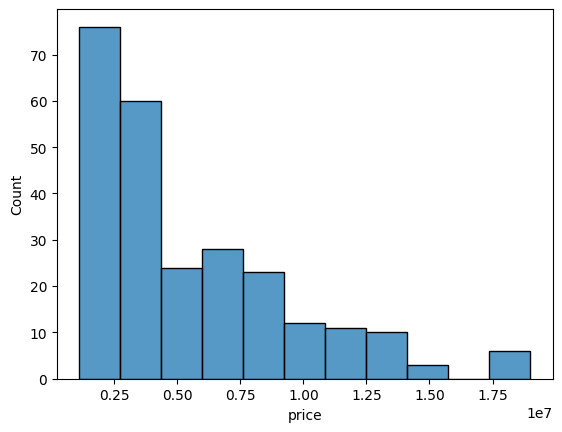

In [175]:
sns.histplot(Y_respuesta)

In [176]:
# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(x_explicativa, Y_respuesta, test_size=0.2, random_state=42)

In [177]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

In [178]:
# Crear el modelo de Random Forest
# modelo = GridSearchCV(estimator=xgb.XGBRegressor(subsample=0.8, colsample_bytree=0.8, random_state=42), 
#                       param_grid={'n_estimators': [10, 100, 500, 1000, 1500], 'max_depth': [2,4,6,8,10,12], 'learning_rate':[0.1, 0.2, 0.3]})

modelo = xgb.XGBRegressor(n_estimators=1000, max_depth=6, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42)

In [179]:
# Entrenar el modelo
modelo.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [180]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

In [181]:
# Calcular el error cuadrático medio (MSE)
mape = MAPE(y_test, y_pred)
print(f"MAPE: {mape}")

# Para realizar predicciones con nuevas observaciones
prediccion = modelo.predict(X_test)
print(f"Predicción para nuevas observaciones: {prediccion}")

MAPE: 0.3324437939543814
Predicción para nuevas observaciones: [ 3351881.2  2000001.9  6593151.   4277551.5 11002570.   6497350.5
  4241185.5  6920538.   2935662.   2680348.   9804091.   7998155.5
  3936582.2 11411943.   2919188.8  1794721.5  2834187.2 11528881.
  2072125.1  2925768.8  7630145.5  2180366.   6604117.5  8176708.
  1831472.9  2652164.  10911544.   5340647.5  4158720.2  5118603.5
  2024192.   6179728.  11249993.   3892863.   6575060.   3281062.
  2788756.5  2130197.5 10576547.   5210086.   2498511.8  2919915.2
  8693682.  15335556.   4650365.5  9096427.   6278706.5  1794721.5
  5616046.   8099697.  12499764. ]


In [14]:
print(nuevas_observaciones.shape)

(1, 5)


KeyError: 'predicciones'